<a href="https://colab.research.google.com/github/ShawnTayNWU/MSDS460/blob/Assignments/MSDS_460_Assignment_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Packages

In [ ]:
 !pip install pulp #Run this only the first time, no need to install each time

# import the library pulp as p
import pulp as p
  


     |████████████████████████████████| 14.2 MB 24.7 MB/s 


## 2. Define variables, problem, objective function and constraints







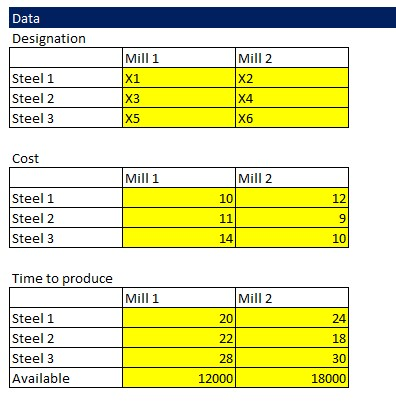

In [ ]:
 # Create a LP Minimization problem
Lp_prob = p.LpProblem('Problem', p.LpMinimize) 
  
# Create problem Variables 
x1 = p.LpVariable("x1", lowBound = 0, cat='Integer')   # Create a variable x1 >= 0
x2 = p.LpVariable("x2", lowBound = 0, cat='Integer')   # Create a variable x2 >= 0
x3 = p.LpVariable("x3", lowBound = 0, cat='Integer')  # Create a variable x3 >= 0
x4 = p.LpVariable("x4", lowBound = 0, cat='Integer') # Create a variable x4 >= 0
x5 = p.LpVariable("x5", lowBound = 0, cat='Integer')  # Create a variable x5 >= 0
x6 = p.LpVariable("x6", lowBound = 0, cat='Integer')   # Create a variable x5 >= 0

  
# Objective Function
Lp_prob += 10 * x1 + 12 * x2 + 11 * x3 + 9 * x4 + 14 * x5 + 10 * x6
  
# Constraints:
Lp_prob += x1 + x2 >= 400                                                                     # 400 tonnes of steel 1 ordered
Lp_prob += x3 + x4 >= 500                                                                     # 500 tonnes of steel 2 ordered
Lp_prob += x5 + x6 >= 300                                                                     # 300 tonnes of steel 3 ordered
Lp_prob += (20*x1 + 22*x3 + 28*x5)/12000 - (24*x2 + 18*x4 + 30*x6)/18000 <= 0.00001       # Utlization of Mills must be the same
Lp_prob += (20*x1 + 22*x3 + 28*x5)/12000 - (24*x2 + 18*x4 + 30*x6)/18000 >= -0.00001       # Utlization of Mills must be the same
Lp_prob += (x3 + x4) <= (x1 + x2 + x5 + x6)                                                   # Steel 2 production <= Steel 1 + Steel 3 production   

  
# Display the problem
print(Lp_prob)


Problem:
MINIMIZE
10*x1 + 12*x2 + 11*x3 + 9*x4 + 14*x5 + 10*x6 + 0
SUBJECT TO
_C1: x1 + x2 >= 400

_C2: x3 + x4 >= 500

_C3: x5 + x6 >= 300

_C4: 0.00166666666667 x1 - 0.00133333333333 x2 + 0.00183333333333 x3
 - 0.001 x4 + 0.00233333333333 x5 - 0.00166666666667 x6 <= 1e-05

_C5: 0.00166666666667 x1 - 0.00133333333333 x2 + 0.00183333333333 x3
 - 0.001 x4 + 0.00233333333333 x5 - 0.00166666666667 x6 >= -1e-05

_C6: - x1 - x2 + x3 + x4 - x5 - x6 <= 0

VARIABLES
0 <= x1 Integer
0 <= x2 Integer
0 <= x3 Integer
0 <= x4 Integer
0 <= x5 Integer
0 <= x6 Integer



## 3. Solve Problem and print outputs

In [ ]:
  
status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])   # The solution status
  
# Printing the final solution
print(p.value(x1), p.value(x2), p.value(x3), p.value(x4), p.value(x5), p.value(x6), p.value(Lp_prob.objective))  

Optimal
400.0 0.0 112.0 388.0 4.0 296.0 11740.0
